# Q1. Import Libraries and dataset

In [211]:
import pandas as pd                                                  # library for working with dataframes
import numpy as np                                                   # library for working with arrays

import matplotlib.pyplot as plt                                      # low level visualization library
import seaborn as sns                                                # higher level visualization library compared to matplotlib
import pandas_profiling                                              # library for creating a data profile. Note that we are using pandas_profiling v2.6 that works with pandas v1.0+

from sklearn.model_selection import train_test_split                 # library for splitting data before modeling 
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression                  # library with linear model for machine learning
from yellowbrick.classifier import ClassificationReport, ROCAUC      # library for visualizing result of your model. Install through Anaconda terminal using: pip install yellowbrick
from sklearn.model_selection import GridSearchCV

import statsmodels.api as sm

import math                                                          #For use in creating a subplot grid

In [178]:
# Adjust pandas display and formatting settings

# Remove scientific notations and display numbers with 2 decimal points instead
pd.options.display.float_format = '{:,.2f}'.format        

# Increase cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

# Update default style and size of charts
plt.style.use('ggplot')

# Increase max number of rows and columns to display in pandas tables
pd.set_option('display.max_columns', 500)           
pd.set_option('display.max_rows', 500) 

In [179]:
##1. Load dataset and do basic checks

loans = pd.read_csv("Bank_Personal_Loan_Modelling.csv")
loans.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.00,2,0,0,0,0,0,1


In [180]:
loans.shape

(5000, 14)

In [181]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [182]:
loans.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,"5,000.00","2,500.50","1,443.52",1.00,"1,250.75","2,500.50","3,750.25","5,000.00"
Age,"5,000.00",45.34,11.46,23.00,35.00,45.00,55.00,67.00
Experience,"5,000.00",20.10,11.47,-3.00,10.00,20.00,30.00,43.00
Income,"5,000.00",73.77,46.03,8.00,39.00,64.00,98.00,224.00
ZIP Code,"5,000.00","93,152.50","2,121.85","9,307.00","91,911.00","93,437.00","94,608.00","96,651.00"
Family,"5,000.00",2.40,1.15,1.00,1.00,2.00,3.00,4.00
CCAvg,"5,000.00",1.94,1.75,0.00,0.70,1.50,2.50,10.00
Education,"5,000.00",1.88,0.84,1.00,1.00,2.00,3.00,3.00
Mortgage,"5,000.00",56.50,101.71,0.00,0.00,0.00,101.00,635.00
Personal Loan,"5,000.00",0.10,0.29,0.00,0.00,0.00,0.00,1.00


* Average Age is 45 years
* Experience has negative values
* Only 6% of the customers have a certificate of deposit (CD) account with the bank.
* Around 71% of the customer doesn’t use a credit card issued by UniversalBank.
* Around 60% of customers use internet banking facilities.
* Around 90% of the customer doesn’t accept the personal loan offered in the last campaign.
* Around 90% of the customer doesn’t have a securities account with the bank.

In [183]:
loans.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [184]:
loans.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

# Q2. EDA

In [186]:
# Get unique values for all columns
loans.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [188]:
# No. of people with zero mortgage
loans[loans.Mortgage == 0].shape[0]

3462

In [41]:
# No. of people with zero credit card spending per month
loans[loans.CCAvg == 0].shape[0]

106

In [67]:
# Value counts of all categorical columns
for col in ['Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']:
    print(loans[col].value_counts())

1    2096
3    1501
2    1403
Name: Education, dtype: int64
0    4520
1     480
Name: Personal Loan, dtype: int64
0    4478
1     522
Name: Securities Account, dtype: int64
0    4698
1     302
Name: CD Account, dtype: int64
1    2984
0    2016
Name: Online, dtype: int64
0    3530
1    1470
Name: CreditCard, dtype: int64


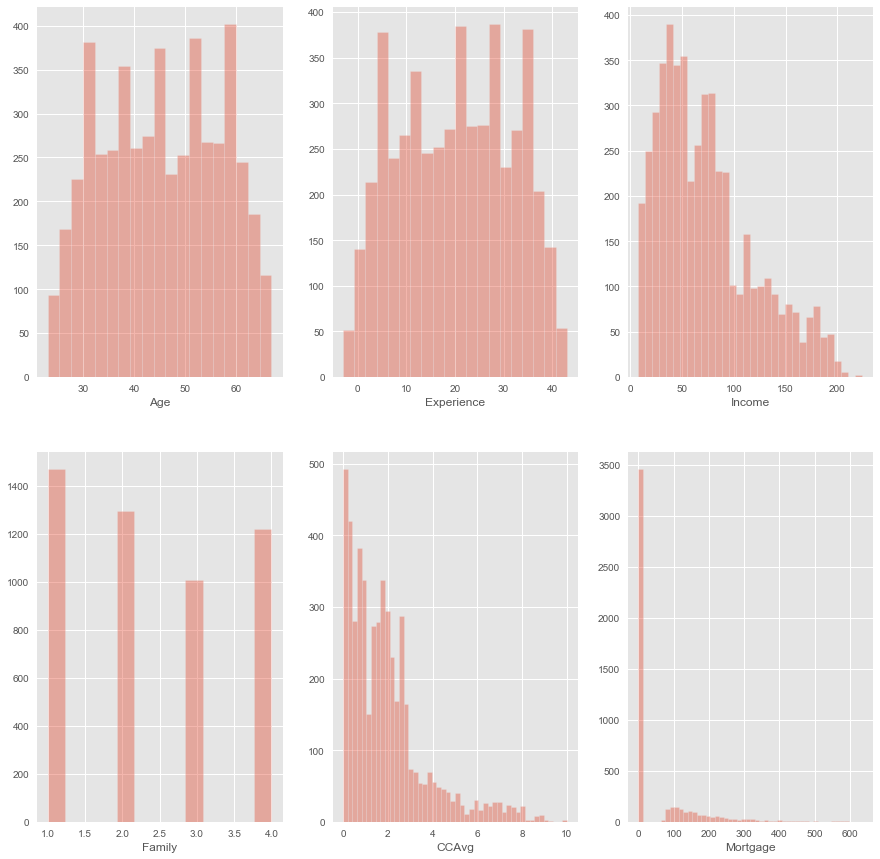

In [189]:
#Univariate analysis: Continous features
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize=(15,15))

colIndex = 0 
for col in ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage']:
    sns.distplot(loans[col], kde=False, rug=False, ax = axs[math.floor(colIndex/3)][colIndex % 3]);
    colIndex += 1

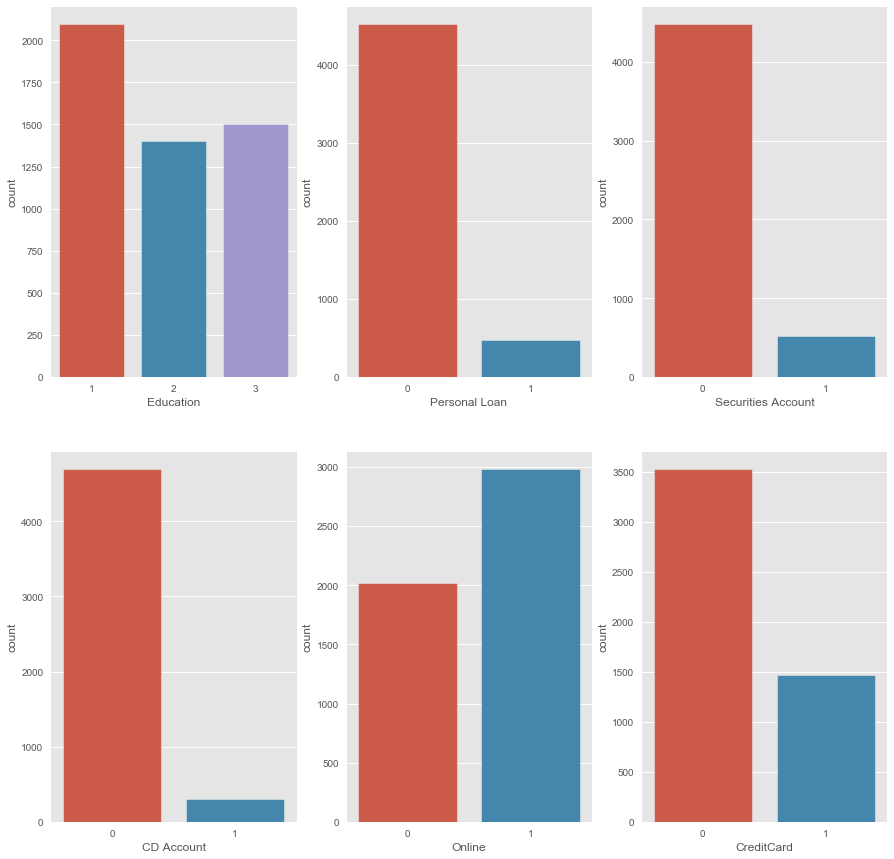

In [92]:
#Univariate analysis: Categorical features
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize=(15,15))

colIndex = 0 
for col in ['Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']:
    sns.countplot(loans[col], ax = axs[math.floor(colIndex/3)][colIndex % 3]);
    colIndex += 1

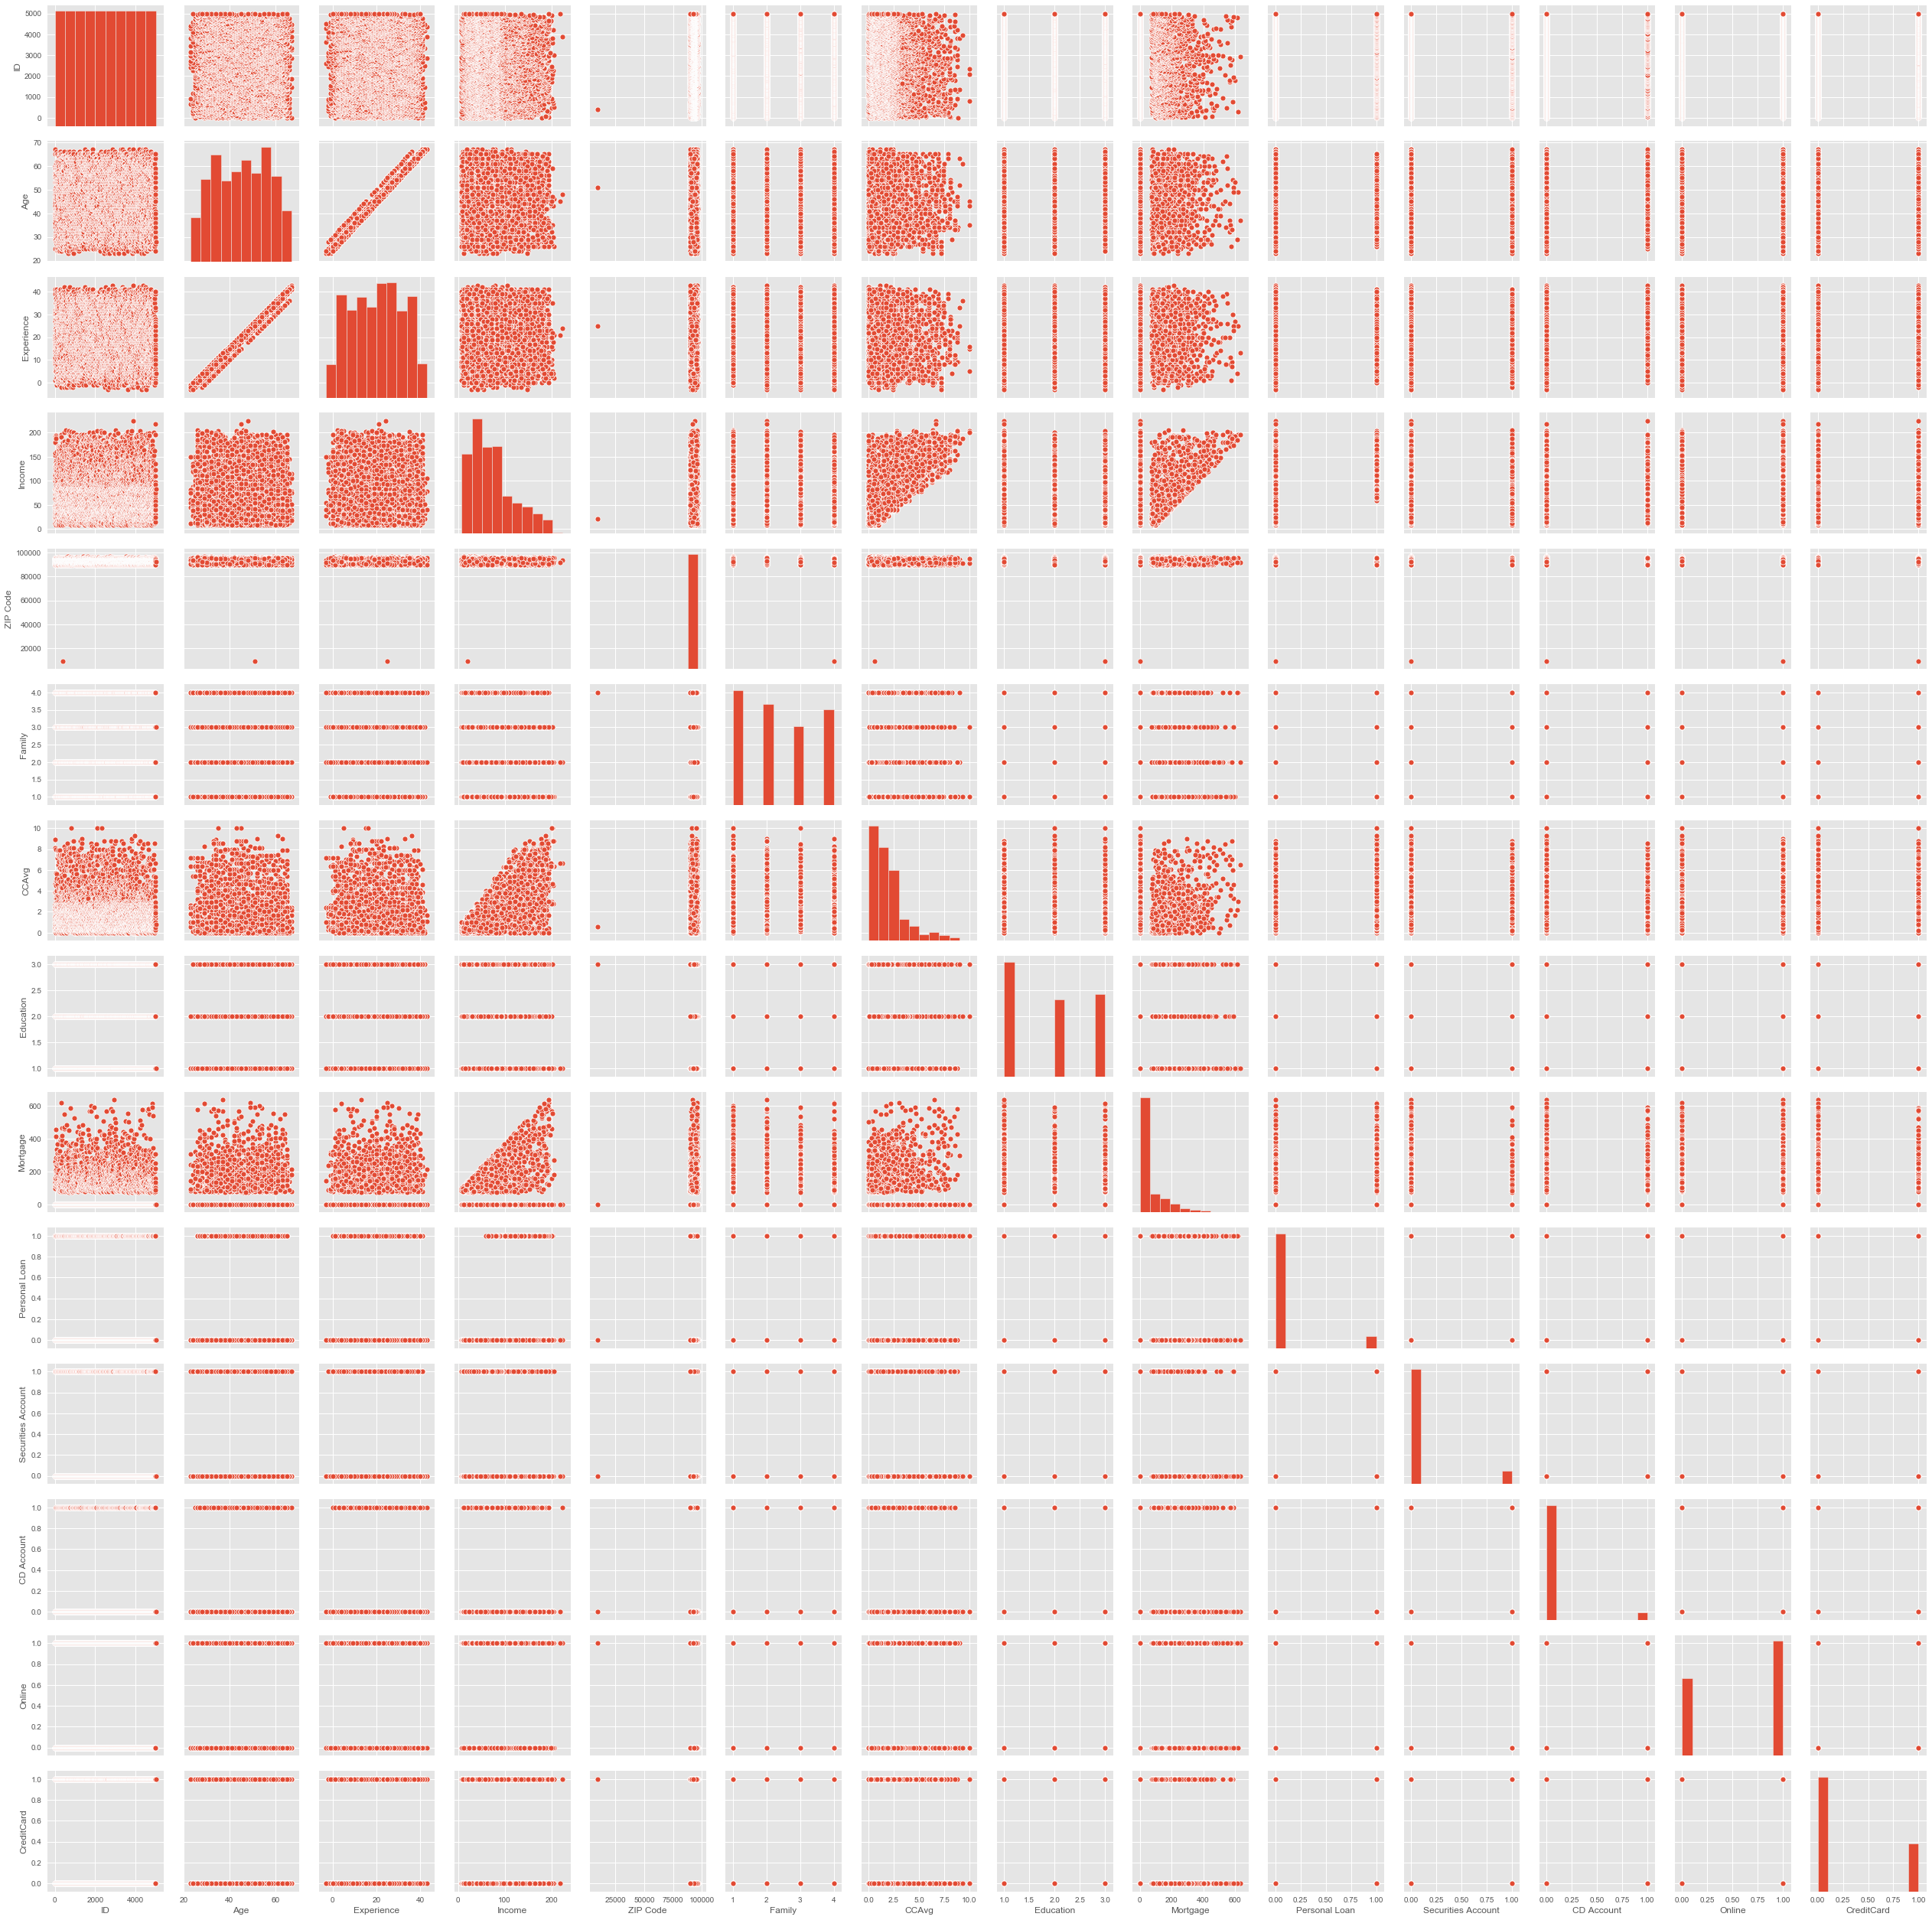

In [96]:
#Bivariate analysis
sns.pairplot(loans)

In [191]:
# Check the correlation amongst the features
loans.corr()

# Personal loan seems to have a high correlation with Income and CCAvg

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.00,-0.01,-0.01,-0.02,0.01,-0.02,-0.02,0.02,-0.01,-0.02,-0.02,-0.01,-0.00,0.02
Age,-0.01,1.00,0.99,-0.06,-0.03,-0.05,-0.05,0.04,-0.01,-0.01,-0.00,0.01,0.01,0.01
Experience,-0.01,0.99,1.00,-0.05,-0.03,-0.05,-0.05,0.01,-0.01,-0.01,-0.00,0.01,0.01,0.01
Income,-0.02,-0.06,-0.05,1.00,-0.02,-0.16,0.65,-0.19,0.21,0.50,-0.00,0.17,0.01,-0.00
ZIP Code,0.01,-0.03,-0.03,-0.02,1.00,0.01,-0.00,-0.02,0.01,0.00,0.00,0.02,0.02,0.01
Family,-0.02,-0.05,-0.05,-0.16,0.01,1.00,-0.11,0.06,-0.02,0.06,0.02,0.01,0.01,0.01
CCAvg,-0.02,-0.05,-0.05,0.65,-0.00,-0.11,1.00,-0.14,0.11,0.37,0.02,0.14,-0.00,-0.01
Education,0.02,0.04,0.01,-0.19,-0.02,0.06,-0.14,1.00,-0.03,0.14,-0.01,0.01,-0.02,-0.01
Mortgage,-0.01,-0.01,-0.01,0.21,0.01,-0.02,0.11,-0.03,1.00,0.14,-0.01,0.09,-0.01,-0.01
Personal Loan,-0.02,-0.01,-0.01,0.50,0.00,0.06,0.37,0.14,0.14,1.00,0.02,0.32,0.01,0.00


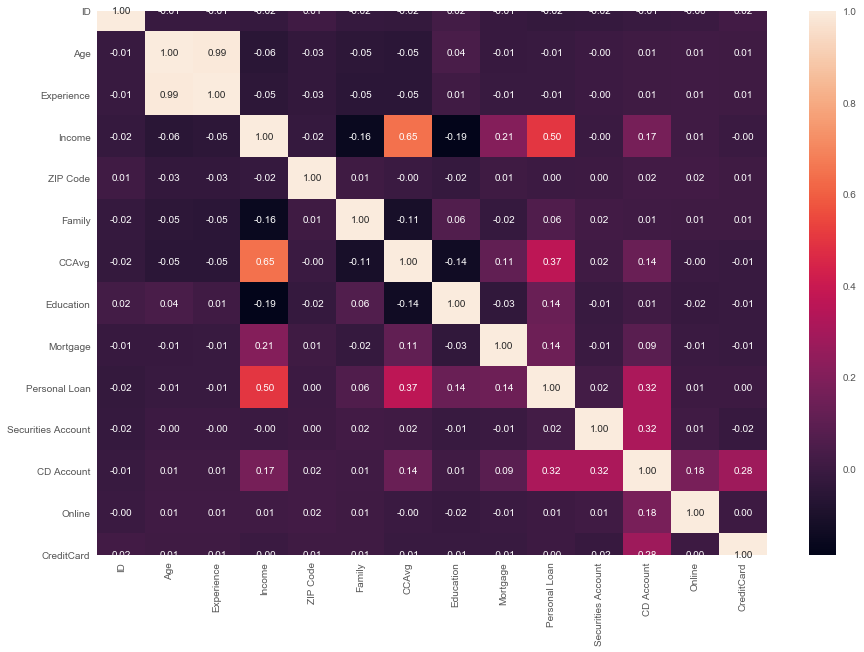

In [195]:
# Create a Heat map
plt.figure(figsize=(15,10))
sns.heatmap(loans.corr(), annot=True, fmt='.2f');

In [197]:
# Get data model ready

# Convert numeric fields to string for one-hot encoding
loans['Education'] = loans['Education'].astype('category')
loans['Family'] = loans['Family'].astype('category')
loans['Personal Loan'] = loans['Personal Loan'].astype('category')
loans['Securities Account'] = loans['Securities Account'].astype('category')
loans['CD Account'] = loans['CD Account'].astype('category')
loans['Online'] = loans['Online'].astype('category')
loans['CreditCard'] = loans['CreditCard'].astype('category')

# Create binary numeric fields from categorical variables
loans = pd.get_dummies(loans, columns = ['Education'], drop_first = True)
loans = pd.get_dummies(loans, columns = ['Family'], drop_first = True)
loans = pd.get_dummies(loans, columns = ['Personal Loan'], drop_first = True)
loans = pd.get_dummies(loans, columns = ['Securities Account'], drop_first = True)
loans = pd.get_dummies(loans, columns = ['CD Account'], drop_first = True)
loans = pd.get_dummies(loans, columns = ['Online'], drop_first = True)
loans = pd.get_dummies(loans, columns = ['CreditCard'], drop_first = True)

loans.head()

,ID,Age,Experience,Income,ZIP Code,CCAvg,Mortgage,Education_2,Education_3,Family_2,Family_3,Family_4,Personal Loan_1,Securities Account_1,CD Account_1,Online_1,CreditCard_1
0,1,25,1,49,91107,1.60,0,0,0,0,0,1,0,1,0,0,0
1,2,45,19,34,90089,1.50,0,0,0,0,1,0,0,1,0,0,0
2,3,39,15,11,94720,1.00,0,0,0,0,0,0,0,0,0,0,0
3,4,35,9,100,94112,2.70,0,1,0,0,0,0,0,0,0,0,0
4,5,35,8,45,91330,1.00,0,1,0,0,0,1,0,0,0,0,1


# Q3. Split the data into training and test data

In [198]:
# Select predictors
# Remove Experience as it has a very high correlation with Age
# Ignore ID and Zip code
features = [col for col in loans.columns if col not in ['ID', 'ZIP Code', 'Experience', 'Personal Loan_1']]

# Define X and Y variables
X = loans[features]
y = loans['Personal Loan_1']

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1)

# Q4. Predict

In [199]:
## Define the model
lg = LogisticRegression(solver = 'liblinear')

# Train the model
lg.fit(X_train, y_train)

# Predict
y_pred = lg.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [200]:
# Evaluate the model
accuracy_score = accuracy_score(y_test, y_pred)
accuracy_score 

0.95

/Users/kumarashok/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


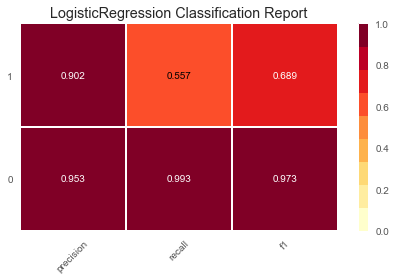

/Users/kumarashok/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


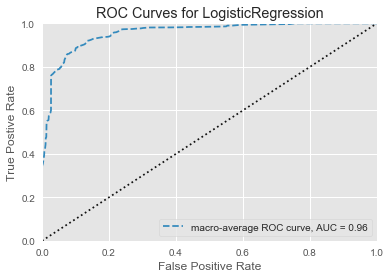

In [160]:
# Evaluate with the yellowbricks library
lg = LogisticRegression(solver = 'liblinear')

viz = ClassificationReport(lg)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(lg, macro=True, micro=False, per_class=False)
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show();

In [161]:
# Confusion Matrix
pd.crosstab(y_test, lg.predict(X_test), rownames=['Actual'], colnames=['Predicted'])

Predicted,0,1
Actual,,
0,1342,9
1,66,83


# Q5. How can the model perform better?


* 1. Train the model with sufficiently large data set to avoid underfit/overfit issues

* 2. Vary the solver of LogisticRegression
  For small datasets, 'liblinear' is a good choice, whereas 'sag' and 'saga' are faster for large ones.
  
* 3. Provide class_weight parameter to LogisticRegression
  A higher weightage to fields like income that has high correlation with the target varaible will yield better results
  
* 4. Vary the C parameter to apply different regularization values
    

In [207]:
# Use GridSearchCV to try out different combinations of solvers and C values
paramsGrid = [{'solver': ['newton-cg','lbfgs','liblinear','sag','saga'], 'C': [0.001,0.01,0.1,0.25,0.5,0.75,1],
              'class_weight':['balanced'], 'penalty':['l2']}]
gridSearch = GridSearchCV(LogisticRegression(),param_grid,cv=5, verbose=0)

In [209]:
gridSearch.fit(X_train,y_train)

/Users/kumarashok/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/kumarashok/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/kumarashok/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/kumarashok/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/kumarashok/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model

/Users/kumarashok/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/kumarashok/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/kumarashok/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/kumarashok/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/kumarashok/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model

/Users/kumarashok/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/kumarashok/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/kumarashok/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/kumarashok/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/kumarashok/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model

/Users/kumarashok/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/kumarashok/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/kumarashok/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/kumarashok/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/kumarashok/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1],
                          'class_weight': ['balanced'], 'penalty': ['l2'],
                          'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                     'saga']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
   

In [210]:
# Find the parameters that generated the best model
gridSearch.best_estimator_

LogisticRegression(C=0.5, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

# Q6. Business understanding of model

In [206]:
#Build the logistic regression model for statistical inference
logit = sm.Logit(y_train, sm.add_constant(X_train))
lg = logit.fit()
print(lg.summary2())

Optimization terminated successfully.
         Current function value: inf
         Iterations 10
                             Results: Logit
Model:                   Logit               Pseudo R-squared:    inf   
Dependent Variable:      Personal Loan_1     AIC:                 inf   
Date:                    2020-05-08 14:48    BIC:                 inf   
No. Observations:        3500                Log-Likelihood:      -inf  
Df Model:                13                  LL-Null:             0.0000
Df Residuals:            3486                LLR p-value:         1.0000
Converged:               1.0000              Scale:               1.0000
No. Iterations:          10.0000                                        
------------------------------------------------------------------------
                      Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
------------------------------------------------------------------------
const                -13.5484   0.8393 -16.1426 0.0000 

/Users/kumarashok/opt/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1736: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/kumarashok/opt/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1789: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Users/kumarashok/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/kumarashok/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [163]:
# Create a dataframe with odds ratio, probability and pval
lgcoef = pd.DataFrame(lg.params, columns=['coef'])
lgcoef['Odds_ratio'] = np.exp(lgcoef.coef)
lgcoef['probability'] = lgcoef['Odds_ratio']/(1+lgcoef['Odds_ratio'])
lgcoef['pval']= lg.pvalues

In [164]:
# Filter by significant p-value (pval <0.1) and sort descending by Odds ratio
lgcoef = lgcoef.sort_values(by="Odds_ratio", ascending=False)
lgcoef[lgcoef['pval'] < 0.1]

,coef,Odds_ratio,probability,pval
Education_3,4.27,71.26,0.99,0.00
Education_2,4.00,54.81,0.98,0.00
CD Account_1,3.71,40.84,0.98,0.00
Family_3,2.49,12.05,0.92,0.00
Family_4,1.64,5.17,0.84,0.00
CCAvg,0.25,1.28,0.56,0.00
Income,0.06,1.06,0.52,0.00
Online_1,-0.59,0.56,0.36,0.00
CreditCard_1,-1.00,0.37,0.27,0.00
Securities Account_1,-1.07,0.34,0.26,0.01


## Inference of the model

* Customers with Education level of Undergrad and above have more than 54 times higher odds to accept the personal loan
* Customers having a CD account have 40 times higher higher odds to accept the personal loan
* Customers having a family size of 3 have 12 times higher higher odds to accept the personal loan